<a href="https://colab.research.google.com/github/Sourav-Manik/AI_Deep_Learning/blob/main/CNN_Architecture_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

##2.Import the data using Image Augumentation

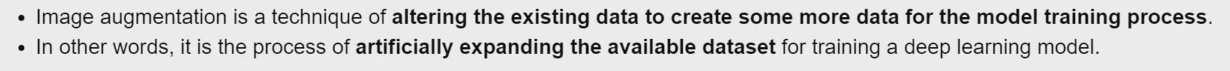

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.3,zoom_range=0.2,rotation_range = 0,horizontal_flip=True)
validation_data = ImageDataGenerator(rescale = 1./255)
test_data = ImageDataGenerator(rescale = 1./255)

In [ ]:
# train_path      = train_data.flow_from_directory(directory = r'D:\DS_and_AI\CNN_train_test_images\train_data',
#                                               target_size = (256,256),
#                                               color_mode = 'rgb')

# validation_path = validation_data.flow_from_directory(directory = r'D:/DS_and_AI/CNN_train_test_images/train_data')

# test_path       = test_data.flow_from_directory(directory = r'D:/DS_and_AI/CNN_train_test_images/test_data')

In [ ]:
trdata = ImageDataGenerator()
train_path = trdata.flow_from_directory(directory='/content/drive/MyDrive/AI/CNN_train_test_img/train_data',target_size=(224,224),color_mode = 'rgb')

validation_path = trdata.flow_from_directory(directory='/content/drive/MyDrive/AI/CNN_train_test_img/train_data')

tsdata = ImageDataGenerator()
test_path = tsdata.flow_from_directory(directory='/content/drive/MyDrive/AI/CNN_train_test_img/test_data',target_size=(224,224))

Found 40 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [ ]:
train_path.class_indices

{'Messi': 0, 'Modi': 1, 'Ritik': 2, 'Virat_Kholi': 3}

##3.Model Building

In [ ]:
import keras,os 
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, Dropout, MaxPooling2D

###3.1.Build the architecture

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape = (224,224,3),filters = 16,kernel_size = (5,5),strides = 1,padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))
model.add(Conv2D(filters = 32,kernel_size = (5,5),strides = 1,padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))
model.add(Flatten())
model.add(Dense(units=2000,activation = 'relu'))
model.add(Dropout(0.30))
model.add(Dense(units=1000,activation = 'relu'))
model.add(Dropout(0.30))
model.add(Dense(units=400,activation = 'relu'))
model.add(Dropout(0.30))
model.add(Dense(units=4,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 2000)              2

###3.2.Compile the Model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

###3.3.Train the Model

In [ ]:
model_training = model.fit(x=train_path,batch_size=32,epochs = 5,validation_data = validation_path,verbose = 1)

Epoch 1/5
2/2 [==============================] - 7s 1s/step - loss: 1493.0071 - accuracy: 0.2250 - val_loss: 5057.0381 - val_accuracy: 0.2500
Epoch 2/5
2/2 [==============================] - 1s 790ms/step - loss: 3082.1868 - accuracy: 0.3000 - val_loss: 579.8925 - val_accuracy: 0.2500
Epoch 3/5
2/2 [==============================] - 1s 505ms/step - loss: 580.9187 - accuracy: 0.2500 - val_loss: 55.5323 - val_accuracy: 0.4750
Epoch 4/5
2/2 [==============================] - 1s 676ms/step - loss: 44.5310 - accuracy: 0.3500 - val_loss: 7.1589 - val_accuracy: 0.5250
Epoch 5/5
2/2 [==============================] - 1s 321ms/step - loss: 9.3000 - accuracy: 0.4000 - val_loss: 3.5285 - val_accuracy: 0.4750


In [ ]:
model.save('multiclass_model.h5')

##Making new predictions

In [ ]:
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
test_image = image.load_img('/content/drive/MyDrive/AI/CNN_train_test_img/th.jpg',target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

In [ ]:
#load model
model = load_model('multiclass_model.h5')

In [ ]:
result = model.predict(test_image)
result

1/1 [==============================] - 0s 18ms/step


array([[5.1739073e-04, 9.9902368e-01, 4.5257332e-04, 6.4283522e-06]],
      dtype=float32)

In [ ]:
if result[0][0] == 1:
  print('Messi')

elif result[0][0] == 1:
  print('Modi')

elif result[0][0] == 1:
  print('Ritik')

else: 
  print('Virat')


Virat


In [ ]:
#End